<h2 align="center" style="color:brown;font-size:200%">Lab 4: Morphological Operations in Image Processing</h2>

## **Introduction:**
Morphological operations are cornerstone techniques in image processing that focus on the shape and structure of objects within an image. Unlike traditional image processing methods that rely on intensity values, these operations employ structuring elements to probe and modify the geometry of objects. 

They are especially useful in preprocessing stages, where they help refine and prepare images for tasks like segmentation, feature extraction, and object recognition. **Erosion**, **dilation**, **opening**, and **closing** are the primary morphological operations, each with a distinct purpose in altering object boundaries. 

The task aimed to explore these operations using different structuring elements, enabling a deeper understanding of their impact. Alongside these, **histogram analysis** was used to study changes in pixel intensity distributions, providing insights into image transformations.

By combining morphological operations with histogram evaluations, the task sought to demonstrate their role in improving image clarity and structural accuracy.


## **Problem Statement:**

- Download the appropriate image with intrusion and extrusion and perform the morphological operations (**Erosion**, **Dilation**, **Opening**, **Closing**). 

- The primary challenge was to preprocess an image for shape analysis, ensuring objects of interest were accurately defined while minimizing noise and irregularities.
- Morphological operations provided a means to refine the structural integrity of objects, crucial for applications such as medical imaging, document analysis, and object recognition.
- By applying these techniques, the task sought to transform the image for better feature extraction and analysis, addressing real-world needs like detecting defects in industrial parts or enhancing scanned documents.



## **Objectives:**

- To apply morphological operations—**erosion**, **dilation**, **opening**, and **closing**—to an image and observe their impact.
  
- To explore the effects of different structuring elements (kernels) on these transformations.
  
- To analyze the histograms of original and transformed images to understand pixel intensity distributions.

## **Morphological Operations:**

- **Erosion:** Erosion is a morphological operation that shrinks or erodes the boundaries of foreground objects in an image by replacing each pixel with the minimum value of its neighborhood. It is mainly used for removing small-scale noise, separating connected objects, and reducing the size of objects in an image.

- **Dilation:** Dilation expands the boundaries of foreground objects by replacing each pixel with the maximum value of its neighborhood, effectively growing the objects. It is used for connecting broken parts, enhancing object structures, and filling small gaps or holes within objects.

- **Opening:** Opening is the combination of erosion followed by dilation, used to remove small noise and smooth the contours of objects in an image. It is effective in eliminating small irrelevant objects and preserving the larger structures by filtering out minor imperfections.

- **Closing:** Closing involves dilation followed by erosion, used to fill small holes or gaps in foreground objects and smooth their boundaries. It is commonly applied to eliminate small dark spots or discontinuities, particularly in binary images, to enhance the object shapes.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
image_path = 'image.png'# Load the image
image = cv2.imread(image_path)

In [3]:
if len(image.shape) == 3:
    print("The image is in color (RGB/BGR).")   
elif len(np.unique(image)) <= 2:
        print("The image is binary.")
elif len(image.shape) == 2:
    print("The image is grayscale.")
else:
    print("The image format is not recognized.")

The image is in color (RGB/BGR).


## **Displaying the Original Image and Its Histogram:**


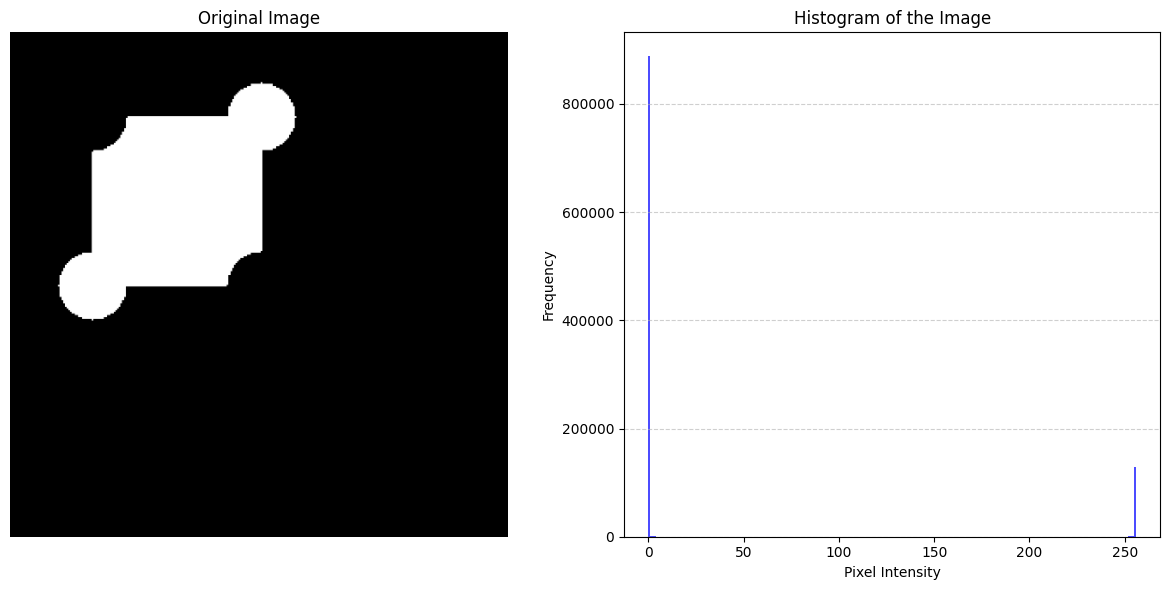

In [74]:
plt.figure(figsize=(12, 6))
# Display Grayscale Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## **Grayscale image conversion:**
To convert the original image to grayscale and visualize it along with its histogram.



In [14]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

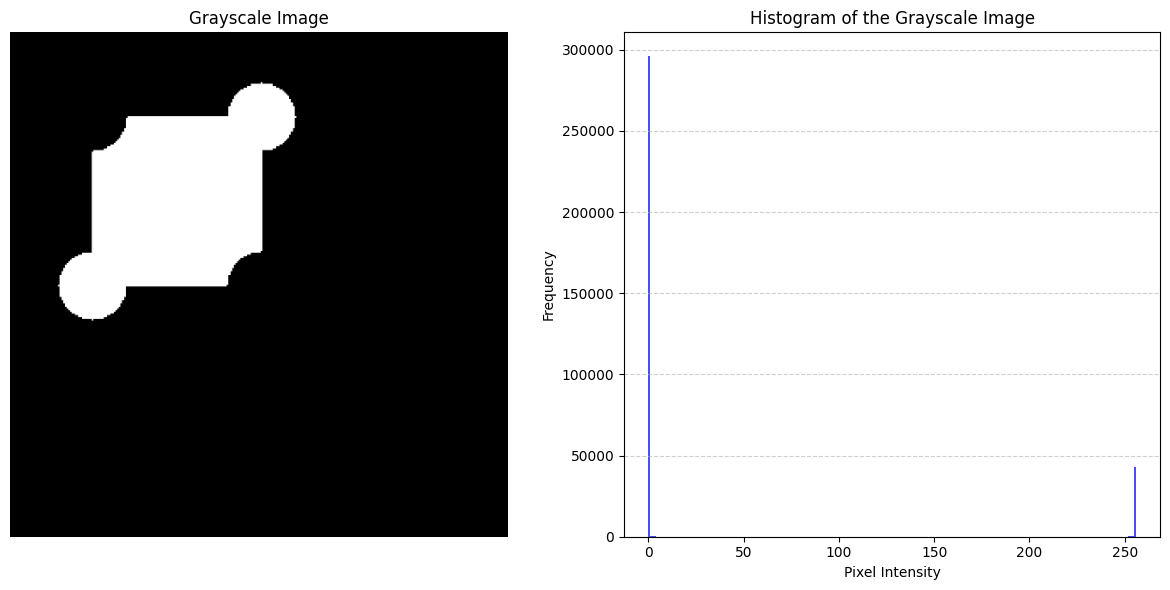

In [22]:
plt.figure(figsize=(12, 6))

# Display Grayscale Image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title("Histogram of the Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## **Binary image conversion:**
Convert the grayscale image into a binary image using thresholding.

In [16]:
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

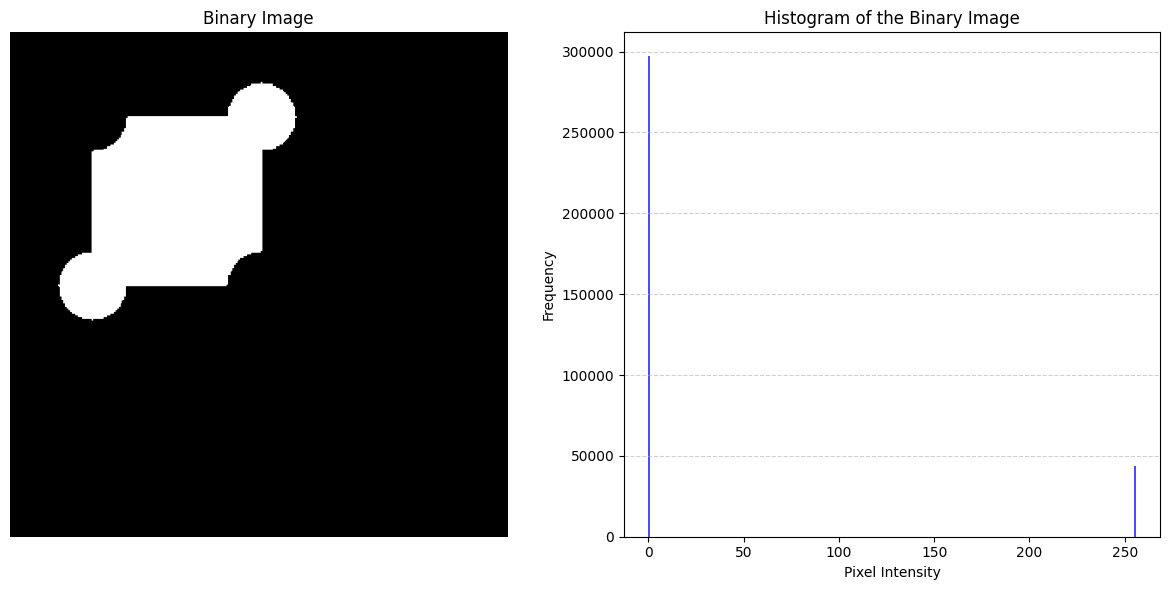

In [24]:
plt.figure(figsize=(12, 6))
# Display Grayscale Image
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(binary_image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title("Histogram of the Binary Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## **Kernels:** Structuring Elements for Morphological Operations
To define different kernels used in morphological operations (erosion, dilation, etc.).

In [105]:
# Define kernels (structuring elements)
kernel_square = np.ones((5, 5), np.uint8)  # 5x5 square kernel
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))  # Elliptical kernel
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))  # Cross kernel

In [106]:
# Display the kernels (optional)
print("Rectangular Kernel:\n", kernel_square)
print("Cross-shaped Kernel:\n", kernel_cross)
print("Elliptical Kernel:\n", kernel_ellipse)

Rectangular Kernel:
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
Cross-shaped Kernel:
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
Elliptical Kernel:
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


# **Erosion:**

Erosion is a morphological operation that shrinks or erodes the boundaries of foreground objects in an image by replacing each pixel with the minimum value of its neighborhood. It is mainly used for removing small-scale noise, separating connected objects, and reducing the size of objects in an image.

## **Erosion Operation on Binary Image:**

In [79]:
eroded_square = cv2.erode(binary_image, kernel_square, iterations=5)
eroded_ellipse = cv2.erode(binary_image, kernel_ellipse, iterations=5)
eroded_cross = cv2.erode(binary_image, kernel_cross, iterations=5)

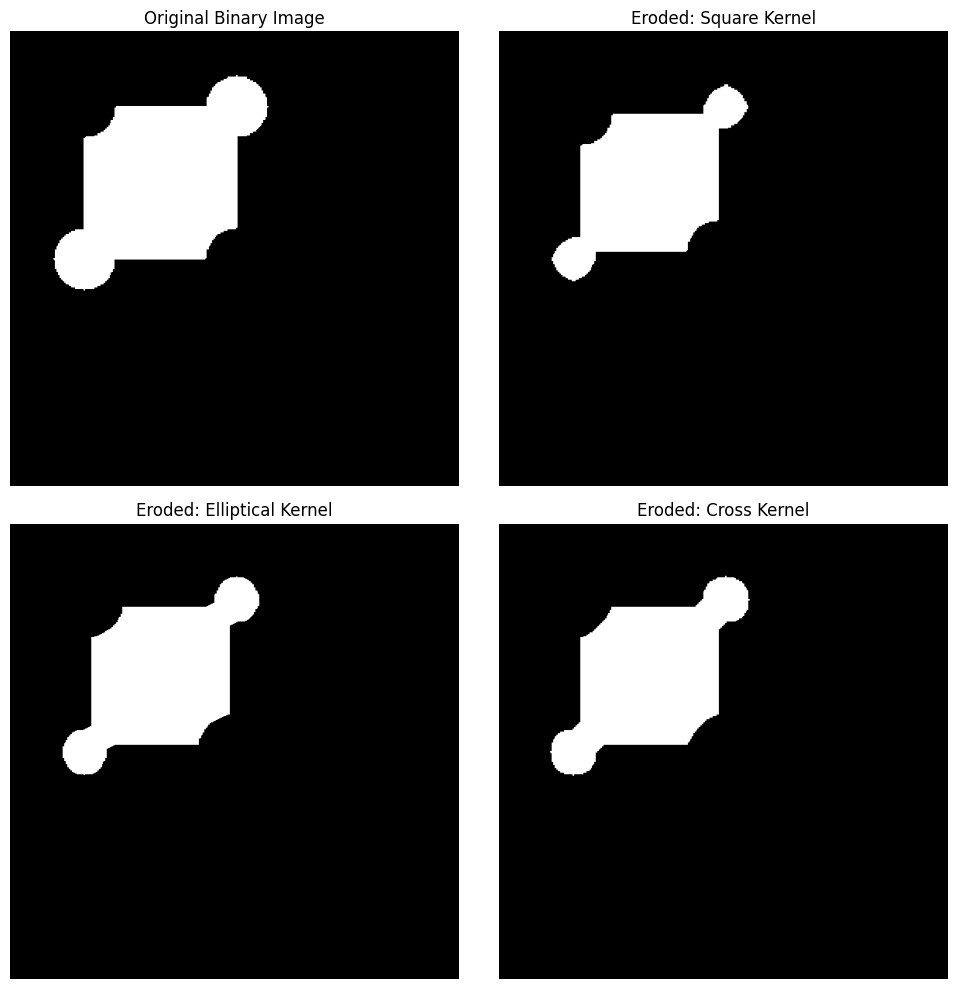

In [80]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2 rows, 2 columns
axs[0, 0].imshow(binary_image, cmap='gray')
axs[0, 0].set_title("Original Binary Image")
axs[0, 0].axis('off')

axs[0, 1].imshow(eroded_square, cmap='gray')
axs[0, 1].set_title("Eroded: Square Kernel")
axs[0, 1].axis('off')

axs[1, 0].imshow(eroded_ellipse, cmap='gray')
axs[1, 0].set_title("Eroded: Elliptical Kernel")
axs[1, 0].axis('off')

axs[1, 1].imshow(eroded_cross, cmap='gray')
axs[1, 1].set_title("Eroded: Cross Kernel")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


## **Interpretaion:**

## Original Binary Image vs. Eroded Images
The original image features white foreground regions with distinct shapes and black background regions. Erosion modifies these shapes by reducing the boundary of the white regions based on the structuring element (kernel) applied.

### **Erosion with Square Kernel**
- The white regions have been reduced significantly along all boundaries.
- Corners and edges appear sharper after erosion because the square kernel applies uniform reduction in all directions.
- The most substantial reduction in white pixels is observed here, leading to a more compact foreground shape.

### **Erosion with Elliptical Kernel**
- Erosion reduces the white regions but maintains a smoother, rounded appearance at the boundaries.
- The corners are less affected compared to the square kernel, showing better preservation of the original curved features.
- This kernel achieves a balanced reduction without overly distorting the shape.

### **Erosion with Cross Kernel**
- The white regions are reduced with distinct thinning along the horizontal and vertical axes.
- Corners are preserved better than in the square kernel, and the erosion effect appears directional (along the cross-shaped structuring element).
- The overall reduction is moderate, showing minimal distortion of the original structure while effectively reducing the size of the foreground.


## **Displaying Histograms of Erosion Results:**

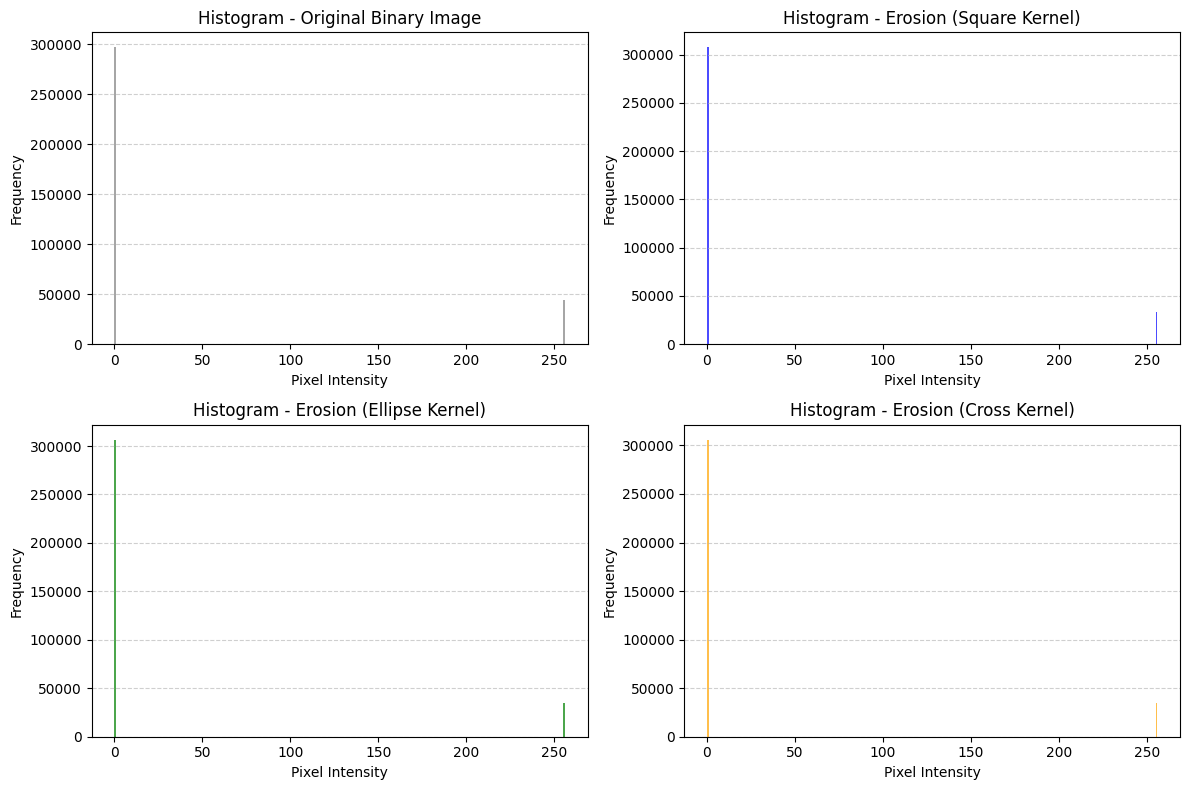

In [83]:
plt.figure(figsize=(12, 8))

# Histogram for Original Image
plt.subplot(2, 2, 1)
plt.hist(binary_image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title("Histogram - Original Binary Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Erosion (Square Kernel)
plt.subplot(2, 2, 2)
plt.hist(eroded_square.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title("Histogram - Erosion (Square Kernel)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Erosion (Ellipse Kernel)
plt.subplot(2, 2, 3)
plt.hist(eroded_ellipse.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.title("Histogram - Erosion (Ellipse Kernel)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Erosion (Cross Kernel)
plt.subplot(2, 2, 4)
plt.hist(eroded_cross.ravel(), bins=256, range=[0, 256], color='orange', alpha=0.7)
plt.title("Histogram - Erosion (Cross Kernel)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## **Computing Image Metrics:**

In [95]:
# Function to compute metrics
def compute_image_metrics(image, kernel_name):
    white_pixels = np.sum(image == 255)  # Count of white pixels
    black_pixels = np.sum(image == 0)    # Count of black pixels
    total_pixels = image.size            # Total number of pixels
    white_percentage = (white_pixels / total_pixels) * 100
    black_percentage = (black_pixels / total_pixels) * 100

    # Output the metrics
    print(f"Metrics for {kernel_name}:")
    print(f"  - Total Pixels: {total_pixels}")
    print(f"  - White Pixels: {white_pixels} ({white_percentage:.2f}%)")
    print(f"  - Black Pixels: {black_pixels} ({black_percentage:.2f}%)")
    print(f"  - Image Dimensions: {image.shape}")
    print("-" * 40)

print("Erosion Operation Metrics:")
compute_image_metrics(binary_image, "Original Binary Image")
compute_image_metrics(eroded_square, "Eroded Image (Square Kernel)")
compute_image_metrics(eroded_ellipse, "Eroded Image (Elliptical Kernel)")
compute_image_metrics(eroded_cross, "Eroded Image (Cross Kernel)")


Erosion Operation Metrics:
Metrics for Original Binary Image:
  - Total Pixels: 341040
  - White Pixels: 43978 (12.90%)
  - Black Pixels: 297062 (87.10%)
  - Image Dimensions: (588, 580)
----------------------------------------
Metrics for Eroded Image (Square Kernel):
  - Total Pixels: 341040
  - White Pixels: 33401 (9.79%)
  - Black Pixels: 307639 (90.21%)
  - Image Dimensions: (588, 580)
----------------------------------------
Metrics for Eroded Image (Elliptical Kernel):
  - Total Pixels: 341040
  - White Pixels: 34515 (10.12%)
  - Black Pixels: 306525 (89.88%)
  - Image Dimensions: (588, 580)
----------------------------------------
Metrics for Eroded Image (Cross Kernel):
  - Total Pixels: 341040
  - White Pixels: 35165 (10.31%)
  - Black Pixels: 305875 (89.69%)
  - Image Dimensions: (588, 580)
----------------------------------------


### **Observations:**
- **Original Image** (White Pixels: 43978, 12.90%)
- **Eroded Image (Square Kernel)**: 33401, 9.79%
- **Eroded Image (Ellipse Kernel)**: 34515, 10.12%
- **Eroded Image (Cross Kernel)**: 35165, 10.31%

### **Inference:**
- All erosion results show a decrease in white pixels, as expected, with the Square Kernel resulting in the largest reduction (9.79%) in white pixels compared to the Ellipse (10.12%) and Cross Kernel (10.31%).
- The Cross Kernel is more effective in reducing the white pixel count (10.31%) while preserving the shape of the foreground better than the Square Kernel.

### **Conclusion:** 
- The **Cross Kernel** for erosion resulted in the best balance of preserving some foreground while reducing white pixels. 
- The **Square Kernel** caused the most significant reduction in white pixels, which may indicate excessive erosion.
-  The **Ellipse Kernel** performed slightly better than the square but still showed a similar trend of reduction in white pixels

## **Analysis:**

### **Square Kernel:**
- **Image**: The erosion effect is uniform, removing small white regions completely and reducing the size of larger white regions.
- **Histogram**: Fewer pixels at higher intensity values (white), indicating reduced white regions.

### **Elliptical Kernel:**
- **Image**: Erosion effect is more rounded, preserving larger circular regions while reducing the size of irregular ones.
- **Histogram**: Similar trend to the square kernel but with less sharp transitions.

### **Cross Kernel:**
- **Image**: Erosion primarily affects horizontal and vertical regions, preserving diagonal structures better.
- **Histogram**: Reflects a distinctive distribution with some remaining high-intensity values for diagonal regions.


## **Interpretaion:**

### **Original Binary Image:**
The original image features white foreground regions with distinct shapes and black background regions. Erosion modifies these shapes by reducing the boundary of the white regions based on the structuring element (kernel) applied.

### **Erosion with Square Kernel**
- The white regions have been reduced significantly along all boundaries.
- Corners and edges appear sharper after erosion because the square kernel applies uniform reduction in all directions.
- The most substantial reduction in white pixels is observed here, leading to a more compact foreground shape.

### **Erosion with Elliptical Kernel**
- Erosion reduces the white regions but maintains a smoother, rounded appearance at the boundaries.
- The corners are less affected compared to the square kernel, showing better preservation of the original curved features.
- This kernel achieves a balanced reduction without overly distorting the shape.

### **Erosion with Cross Kernel**
- The white regions are reduced with distinct thinning along the horizontal and vertical axes.
- Corners are preserved better than in the square kernel, and the erosion effect appears directional (along the cross-shaped structuring element).
- The overall reduction is moderate, showing minimal distortion of the original structure while effectively reducing the size of the foreground.


# **Dilation:**
Dilation expands the boundaries of foreground objects by replacing each pixel with the maximum value of its neighborhood, effectively growing the objects. It is used for connecting broken parts, enhancing object structures, and filling small gaps or holes within objects.

## **Dilation Operation on Binary Image:**

In [75]:
# Apply dilation for each kernel
dilated_square = cv2.dilate(binary_image, kernel_square, iterations=5)
dilated_ellipse = cv2.dilate(binary_image, kernel_ellipse, iterations=5)
dilated_cross = cv2.dilate(binary_image, kernel_cross, iterations=5)

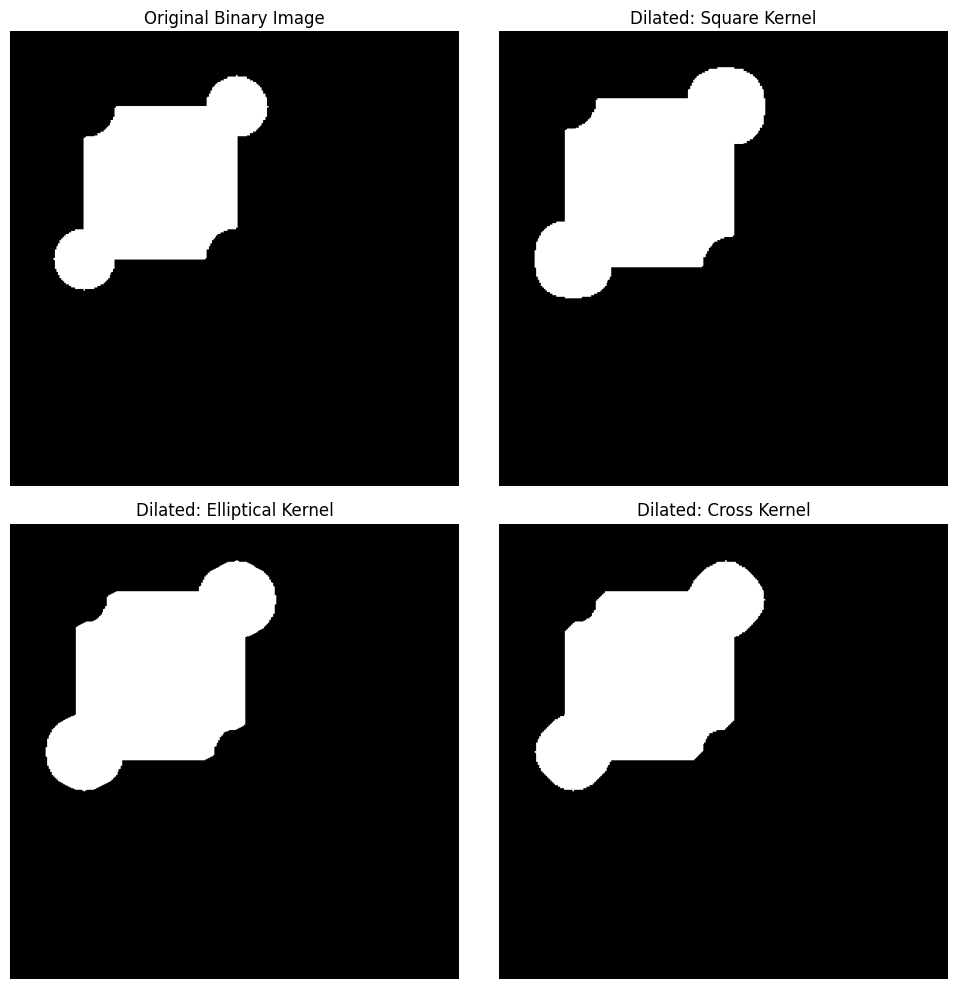

In [76]:
# Display images for dilation operation in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2 rows, 2 columns
axs[0, 0].imshow(binary_image, cmap='gray')
axs[0, 0].set_title("Original Binary Image")
axs[0, 0].axis('off')

axs[0, 1].imshow(dilated_square, cmap='gray')
axs[0, 1].set_title("Dilated: Square Kernel")
axs[0, 1].axis('off')

axs[1, 0].imshow(dilated_ellipse, cmap='gray')
axs[1, 0].set_title("Dilated: Elliptical Kernel")
axs[1, 0].axis('off')

axs[1, 1].imshow(dilated_cross, cmap='gray')
axs[1, 1].set_title("Dilated: Cross Kernel")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

## **Interpretation:**

### **Original Binary Image**
- The binary image serves as the base image, showing distinct white regions on a black background.
- The shapes are well-defined, featuring straight edges and curved protrusions at the corners.
- No morphological transformations have been applied, making this the reference point for comparison.

### **Dilated with Square Kernel**
- The white regions expand uniformly in all directions, thickening the shapes significantly.
- Edges and corners appear rounded due to the kernel's equal influence across the entire boundary.
- The overall structure becomes bulkier, with protrusions merging smoothly into the expanded regions.

### **Dilated with Elliptical Kernel**
- The white regions expand in a smoother, more rounded manner compared to the square kernel.
- The edges are less aggressively thickened, and the overall shape retains a softer, more curved appearance.
- The expansion highlights the curvature of the shapes while maintaining the overall geometry with minimal distortion.

### **Dilated with Cross Kernel**
- Expansion primarily occurs along horizontal and vertical axes, with minimal influence on diagonal directions.
- The shapes retain sharp corners and distinct boundaries in diagonal areas, unlike the smooth rounding seen with other kernels.
- This dilation produces a more structured and linear thickening effect, emphasizing the central axes of the shapes.


## **Displaying Histograms of Dilation Results:**

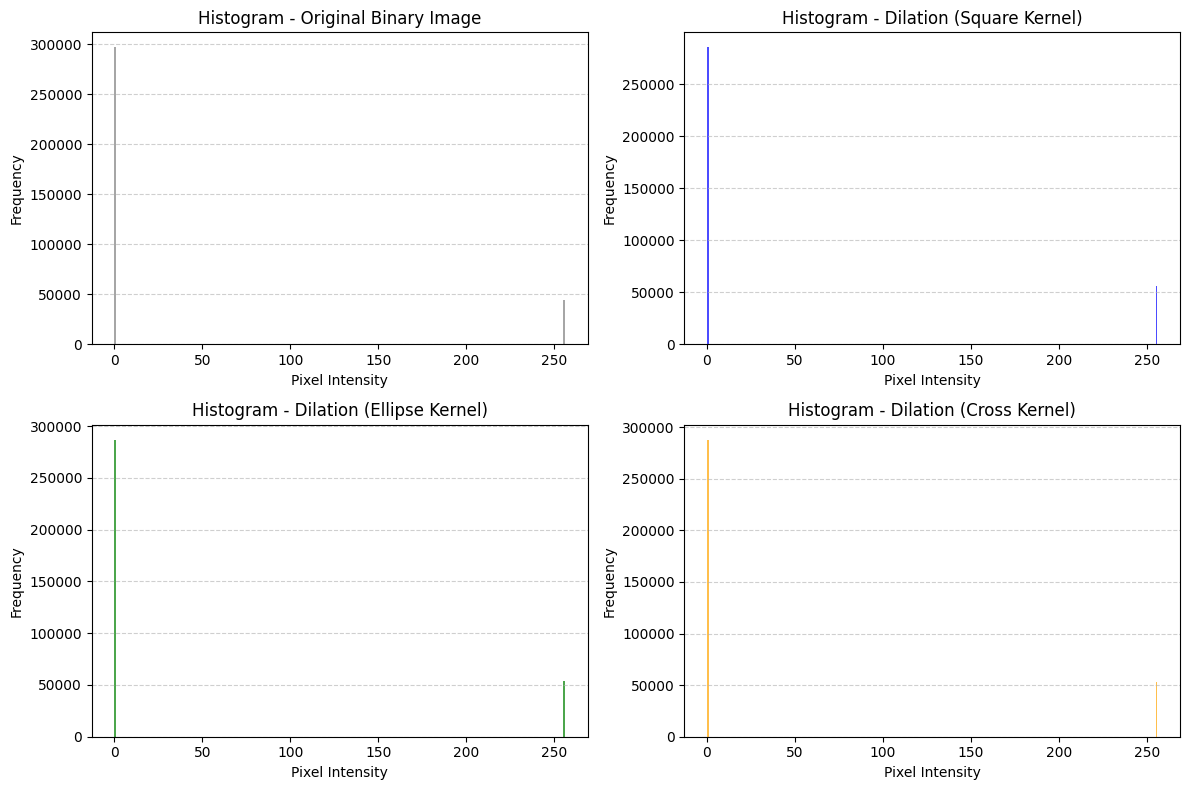

In [85]:
plt.figure(figsize=(12, 8))

# Histogram for Original Image
plt.subplot(2, 2, 1)
plt.hist(binary_image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title("Histogram - Original Binary Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Dilation (Square Kernel)
plt.subplot(2, 2, 2)
plt.hist(dilated_square.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title("Histogram - Dilation (Square Kernel)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Dilation (Ellipse Kernel)
plt.subplot(2, 2, 3)
plt.hist(dilated_ellipse.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.title("Histogram - Dilation (Ellipse Kernel)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Dilation (Cross Kernel)
plt.subplot(2, 2, 4)
plt.hist(dilated_cross.ravel(), bins=256, range=[0, 256], color='orange', alpha=0.7)
plt.title("Histogram - Dilation (Cross Kernel)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## **Computing Image Metrics:**

In [86]:
print("Dilation Operation Metrics:")
compute_image_metrics(binary_image, "Original Binary Image")
compute_image_metrics(dilated_square, "Dilated Image (Square Kernel)")
compute_image_metrics(dilated_ellipse, "Dilated Image (Elliptical Kernel)")
compute_image_metrics(dilated_cross, "Dilated Image (Cross Kernel)")

Dilation Operation Metrics:
Metrics for Original Binary Image:
  - Total Pixels: 341040
  - White Pixels: 43978 (12.90%)
  - Black Pixels: 297062 (87.10%)
  - Image Dimensions: (588, 580)
----------------------------------------
Metrics for Dilated Image (Square Kernel):
  - Total Pixels: 341040
  - White Pixels: 55498 (16.27%)
  - Black Pixels: 285542 (83.73%)
  - Image Dimensions: (588, 580)
----------------------------------------
Metrics for Dilated Image (Elliptical Kernel):
  - Total Pixels: 341040
  - White Pixels: 54093 (15.86%)
  - Black Pixels: 286947 (84.14%)
  - Image Dimensions: (588, 580)
----------------------------------------
Metrics for Dilated Image (Cross Kernel):
  - Total Pixels: 341040
  - White Pixels: 53144 (15.58%)
  - Black Pixels: 287896 (84.42%)
  - Image Dimensions: (588, 580)
----------------------------------------


### **Observations:**
- **Original Image** (White Pixels: 43978, 12.90%)
- **Dilated Image (Square Kernel)**: 55498, 16.27%
- **Dilated Image (Ellipse Kernel)**: 54093, 15.86%
- **Dilated Image (Cross Kernel)**: 53144, 15.58%

### **Inference:**
- Dilation increases the white pixel count as expected.
- The Square Kernel results in the highest number of white pixels (16.27%), indicating the most significant expansion of the white regions.
- The Ellipse Kernel (15.86%) and Cross Kernel (15.58%) also showed significant dilation, but the Square Kernel was the most aggressive in expanding white pixels.

### **Conclusion:**
- The Square Kernel was the most effective in dilating the image and expanding the white regions.
- The Ellipse Kernel and Cross Kernel produced similar results, but they were slightly less aggressive than the Square Kernel.

## **Opening:**

Opening is the combination of erosion followed by dilation, used to remove small noise and smooth the contours of objects in an image. It is effective in eliminating small irrelevant objects and preserving the larger structures by filtering out minor imperfections.

## **Opening Operation on Binary Image:**

In [87]:
# Apply opening for each kernel
opened_square = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel_square, iterations=5)
opened_ellipse = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel_ellipse, iterations=5)
opened_cross = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel_cross, iterations=5)

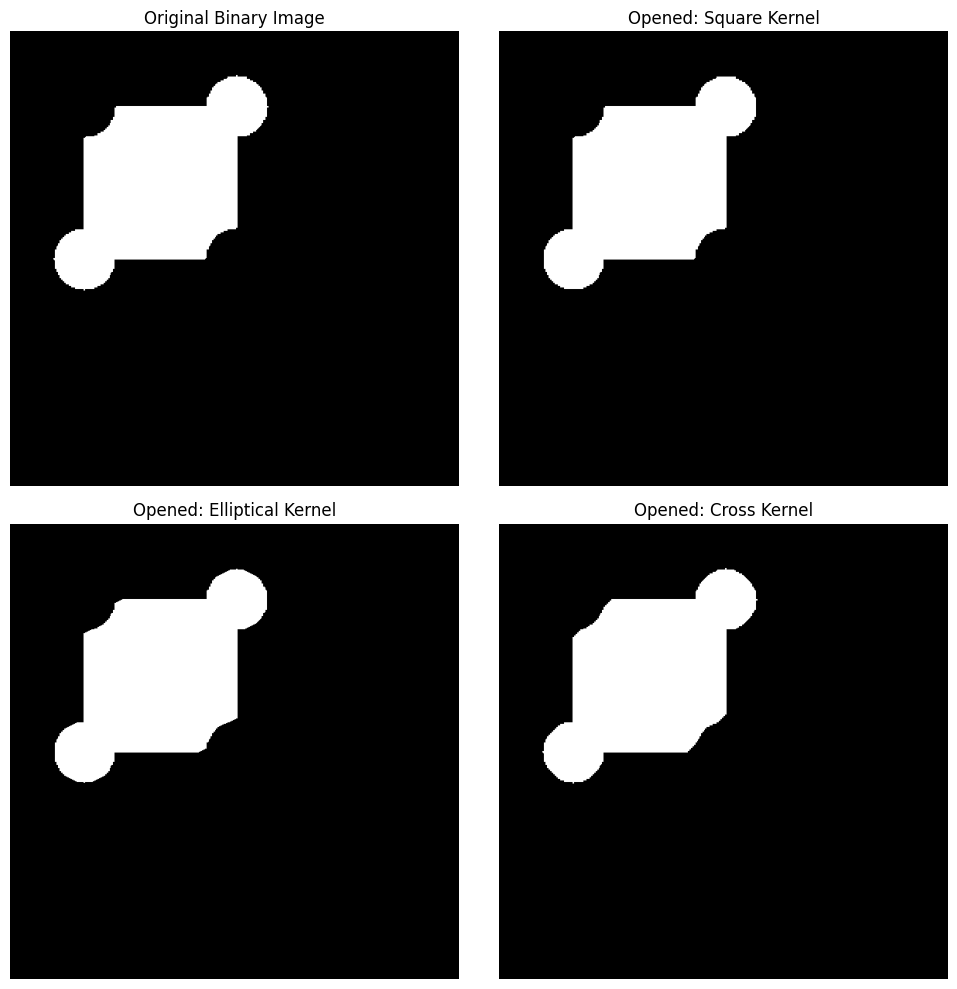

In [88]:
# Display images for opening operation in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2 rows, 2 columns
axs[0, 0].imshow(binary_image, cmap='gray')
axs[0, 0].set_title("Original Binary Image")
axs[0, 0].axis('off')

axs[0, 1].imshow(opened_square, cmap='gray')
axs[0, 1].set_title("Opened: Square Kernel")
axs[0, 1].axis('off')

axs[1, 0].imshow(opened_ellipse, cmap='gray')
axs[1, 0].set_title("Opened: Elliptical Kernel")
axs[1, 0].axis('off')

axs[1, 1].imshow(opened_cross, cmap='gray')
axs[1, 1].set_title("Opened: Cross Kernel")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


## **Interpretation:**

### **Original Binary Image**
- The binary image displays white foreground regions against a black background, with distinct shapes and some minor protrusions.

### **Opened with Square Kernel**
- Noise and smaller protrusions around the white shapes are removed.
- The boundaries are smoother and more compact due to uniform erosion followed by dilation.
- Corners and sharp edges become more pronounced due to the kernel’s rigid, square structure.

### **Opened with Elliptical Kernel**
- Protrusions are removed with a smoother effect than the square kernel.
- The overall shape appears more rounded, maintaining the original structure’s curvature.
- Effective at preserving larger connected regions while reducing noise.

### **Opened with Cross Kernel**
- Opened regions show minimal changes compared to the elliptical kernel but emphasize linear reduction along horizontal and vertical axes.
- Retains more features in the diagonal directions compared to the square kernel, with distinct thinning of the shape.



## **Displaying Histograms of Opening Results:**

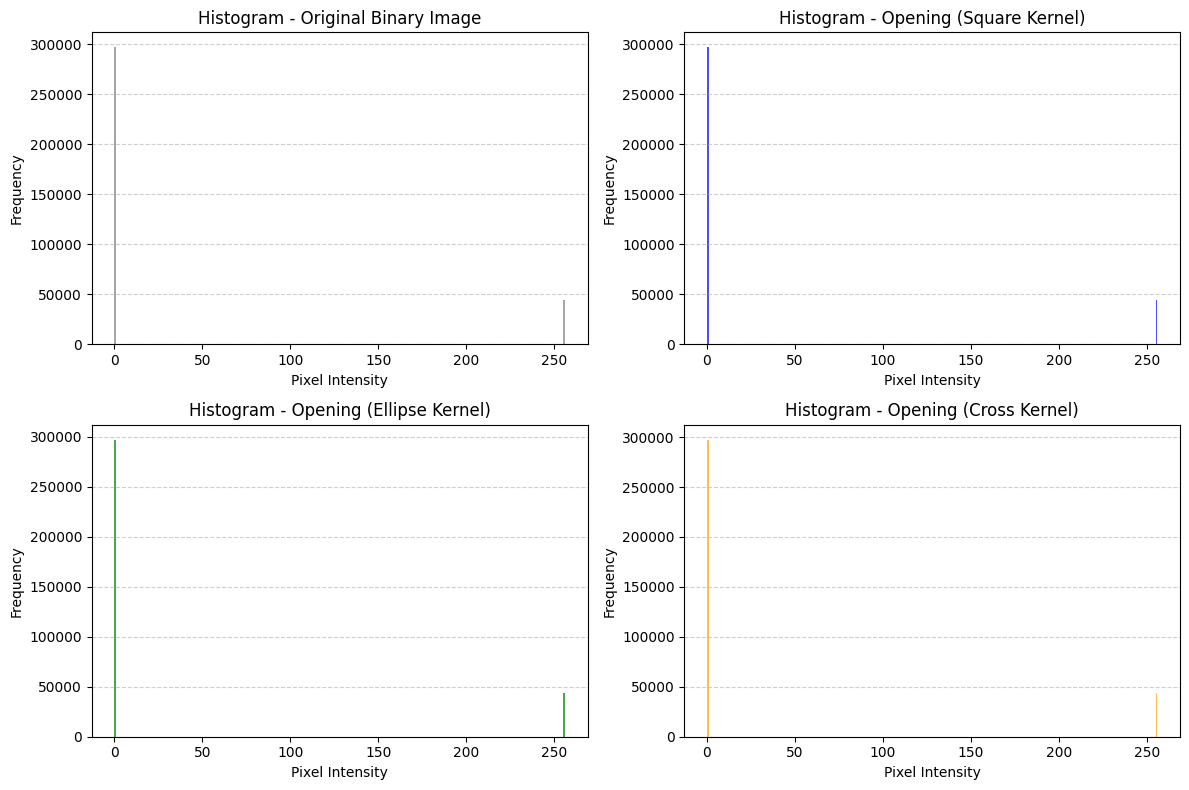

In [89]:
plt.figure(figsize=(12, 8))

# Histogram for Original Image
plt.subplot(2, 2, 1)
plt.hist(binary_image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title("Histogram - Original Binary Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Opening (Square Kernel)
plt.subplot(2, 2, 2)
plt.hist(opened_square.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title("Histogram - Opening (Square Kernel)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Opening (Ellipse Kernel)
plt.subplot(2, 2, 3)
pwlt.hist(opened_ellipse.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.title("Histogram - Opening (Ellipse Kernel)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Opening (Cross Kernel)
plt.subplot(2, 2, 4)
plt.hist(opened_cross.ravel(), bins=256, range=[0, 256], color='orange', alpha=0.7)
plt.title("Histogram - Opening (Cross Kernel)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## **Computing Image Metrics:**

In [90]:
print("Opening Operation Metrics:")
compute_image_metrics(binary_image, "Original Binary Image")
compute_image_metrics(opened_square, "Opened Image (Square Kernel)")
compute_image_metrics(opened_ellipse, "Opened Image (Elliptical Kernel)")
compute_image_metrics(opened_cross, "Opened Image (Cross Kernel)")

Opening Operation Metrics:
Metrics for Original Binary Image:
  - Total Pixels: 341040
  - White Pixels: 43978 (12.90%)
  - Black Pixels: 297062 (87.10%)
  - Image Dimensions: (588, 580)
----------------------------------------
Metrics for Opened Image (Square Kernel):
  - Total Pixels: 341040
  - White Pixels: 43961 (12.89%)
  - Black Pixels: 297079 (87.11%)
  - Image Dimensions: (588, 580)
----------------------------------------
Metrics for Opened Image (Elliptical Kernel):
  - Total Pixels: 341040
  - White Pixels: 43785 (12.84%)
  - Black Pixels: 297255 (87.16%)
  - Image Dimensions: (588, 580)
----------------------------------------
Metrics for Opened Image (Cross Kernel):
  - Total Pixels: 341040
  - White Pixels: 43640 (12.80%)
  - Black Pixels: 297400 (87.20%)
  - Image Dimensions: (588, 580)
----------------------------------------


### **Observations:**
- **Original Image** (White Pixels: 43978, 12.90%)
- **Opened Image (Square Kernel)**: 43961, 12.89%
- **Opened Image (Ellipse Kernel)**: 43785, 12.84%
- **Opened Image (Cross Kernel)**: 43640, 12.80%

### **Inference:**
- Opening operations show very minimal changes in white pixels.
- The Square Kernel has the least effect, with the number of white pixels only dropping slightly (12.89%).
- The Ellipse Kernel (12.84%) and Cross Kernel (12.80%) slightly reduce the number of white pixels compared to the Square Kernel.
### **Conclusion:**
- The Opening operation did not significantly affect the white pixel count for all
kernels.
- However, the Square Kernel was the most stable in preserving the white regions compared to the Ellipse and Cross Kernels, which showed slight reductions.


## **Closing:**

Closing involves dilation followed by erosion, used to fill small holes or gaps in foreground objects and smooth their boundaries. It is commonly applied to eliminate small dark spots or discontinuities, particularly in binary images, to enhance the object shapes.

## **Closing Operation on Binary Image:**

In [98]:
closed_square = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel_square, iterations=5)
closed_ellipse = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel_ellipse, iterations=5)
closed_cross = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel_cross, iterations=5)

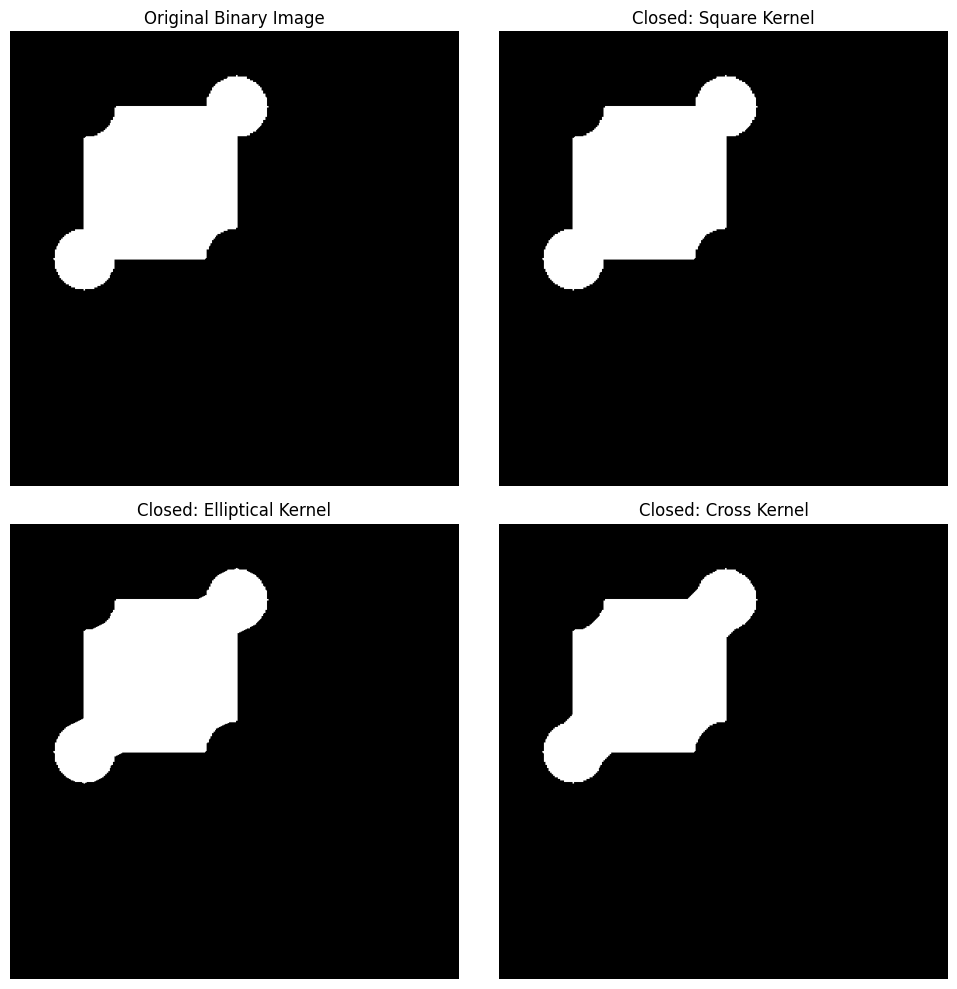

In [99]:
# Display images in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2 rows, 2 columns
axs[0, 0].imshow(binary_image, cmap='gray')
axs[0, 0].set_title("Original Binary Image")
axs[0, 0].axis('off')

axs[0, 1].imshow(closed_square, cmap='gray')
axs[0, 1].set_title("Closed: Square Kernel")
axs[0, 1].axis('off')

axs[1, 0].imshow(closed_ellipse, cmap='gray')
axs[1, 0].set_title("Closed: Elliptical Kernel")
axs[1, 0].axis('off')

axs[1, 1].imshow(closed_cross, cmap='gray')
axs[1, 1].set_title("Closed: Cross Kernel")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

## **Interpretation:**

### **Original Binary Image**
- The binary image displays white foreground regions against a black background, with distinct shapes and some minor gaps.

### **Closed with Square Kernel**
- Small gaps or holes in the shapes are filled uniformly.
- The structure becomes more compact, with a strong emphasis on closing gaps along all axes.
- Sharp edges and corners are less prominent due to the squaring effect of the kernel.

### **Closed with Elliptical Kernel**
- Gaps are filled while maintaining smoother boundaries.
- The shapes become rounded and visually smoother compared to the square kernel, with better preservation of the curved features.

### **Closed with Cross Kernel**
- Gaps are filled in the horizontal and vertical directions, but less impact is seen along the diagonal axes.
- Retains distinct directional effects, emphasizing connectivity in cross-shaped patterns.

## **Displaying Histograms of Closing Results:**

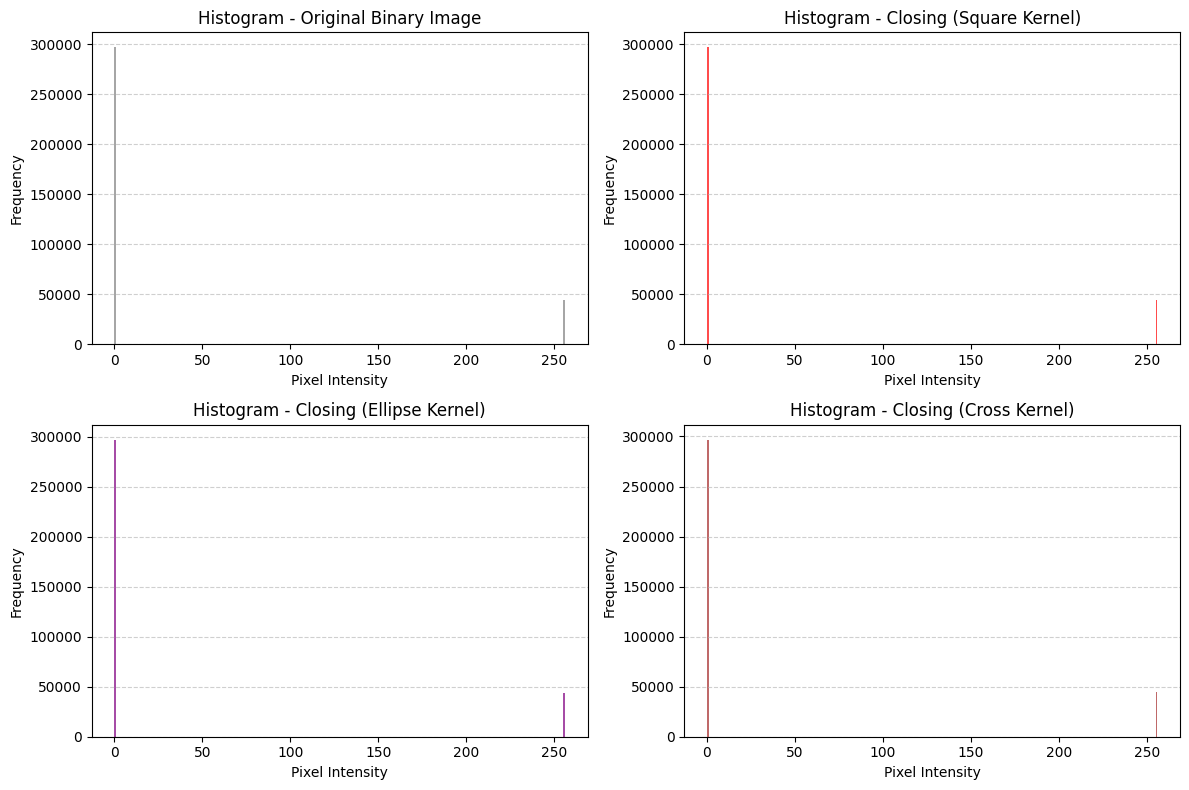

In [100]:
plt.figure(figsize=(12, 8))

# Histogram for Original Image
plt.subplot(2, 2, 1)
plt.hist(binary_image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title("Histogram - Original Binary Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Closing (Square Kernel)
plt.subplot(2, 2, 2)
plt.hist(closed_square.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
plt.title("Histogram - Closing (Square Kernel)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Closing (Ellipse Kernel)
plt.subplot(2, 2, 3)
plt.hist(closed_ellipse.ravel(), bins=256, range=[0, 256], color='purple', alpha=0.7)
plt.title("Histogram - Closing (Ellipse Kernel)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Closing (Cross Kernel)
plt.subplot(2, 2, 4)
plt.hist(closed_cross.ravel(), bins=256, range=[0, 256], color='brown', alpha=0.7)
plt.title("Histogram - Closing (Cross Kernel)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## **Computing Image Metrics:**

In [94]:
# Compute metrics for all images from the closing operation
print("Closing Operation Metrics:")
compute_image_metrics(binary_image, "Original Binary Image")
compute_image_metrics(closed_square, "Closed Image (Square Kernel)")
compute_image_metrics(closed_ellipse, "Closed Image (Elliptical Kernel)")
compute_image_metrics(closed_cross, "Closed Image (Cross Kernel)")

Closing Operation Metrics:
Metrics for Original Binary Image:
  - Total Pixels: 341040
  - White Pixels: 43978 (12.90%)
  - Black Pixels: 297062 (87.10%)
  - Image Dimensions: (588, 580)
----------------------------------------
Metrics for Closed Image (Square Kernel):
  - Total Pixels: 341040
  - White Pixels: 43978 (12.90%)
  - Black Pixels: 297062 (87.10%)
  - Image Dimensions: (588, 580)
----------------------------------------
Metrics for Closed Image (Elliptical Kernel):
  - Total Pixels: 341040
  - White Pixels: 44158 (12.95%)
  - Black Pixels: 296882 (87.05%)
  - Image Dimensions: (588, 580)
----------------------------------------
Metrics for Closed Image (Cross Kernel):
  - Total Pixels: 341040
  - White Pixels: 44249 (12.97%)
  - Black Pixels: 296791 (87.03%)
  - Image Dimensions: (588, 580)
----------------------------------------


### **Observations:**
- **Original Image** (White Pixels: 43978, 12.90%)
- **Closed Image (Square Kernel)**: 43978, 12.90%
- **Closed Image (Ellipse Kernel)**: 44158, 12.95%
- **Closed Image (Cross Kernel)**: 44249, 12.97%

### **Inference:**
- The Square Kernel shows no change in white pixel count (12.90%).
- The Ellipse Kernel (12.95%) and Cross Kernel (12.97%) slightly increase the white pixel count, indicating the closure of small gaps or holes in the foreground.

### **Conclusion:**
- The Cross Kernel performed the best for closing by slightly increasing the white pixel count and closing small gaps.
-  The Ellipse Kernel also showed good results, while the Square Kernel did not change the white pixel count, suggesting it may not have been as effective in closing gaps.


## **Conclusion:**
This task demonstrated the transformative power of morphological operations and histogram analysis in refining and analyzing image structures. The operations helped enhance or suppress specific features, tailored by the structuring element's shape and size. Histogram analysis offered insights into pixel distributions, correlating transformations with intensity variations. These techniques find applications in numerous fields, from healthcare and document processing to industrial automation. By understanding these fundamental concepts and their real-world relevance, we unlock the potential for advanced image processing and analysis, paving the way for innovative applications.